## ***INTORDUCTION***
   Fitness is a huge industry in today's date and everyone nowadays wants to stay healthy and be fit. Most people we know use some kind of supplements be it proteins or vitamins,etc. The supplement industry has insane amount of revenue and the supplement companies have varied products depending on your goals for your body,thus making it a lucrative market.

## ***PROBLEM DEFINITION***

So here's the catch, for an average person purchasing supplements is sometimes costly and many a times he/she wonder why are supplement's so costly?

***What are the things that make them costly? i.e which factors dictate the cost price ?***  
This is what we are going to explore in this notebook using Data Analysis and use a machine Learning models to try and predict the prices. 







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import seaborn as sns
import gc
import re


%matplotlib inline
#sns.set_style('darkgrid')
#sns.set(rc={'figure.figsize':(15,15)})
pd.options.display.max_rows = None
pd.options.display.max_columns = None



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## ***About the Dataset***

I have collected data form bodybuilding.com about two kinds of products. They are as follows:-
* ***Proteins*** : This is a general category which includes various kinds of protein powder like whey, whey isloate, casein,etc
* ***Workout Boosters*** : This is also a general cateogry encompassing workout boosters like creatine, pre-workout, BCAA's,etc

***The data has the follwing columns:***


1.   **Product**: The products name.
2.   **Brand**: The brand which has created the product and markets it.
3.   **Price**: The price of the product
4.   **Rating** : The rating given by the users
5. **Review Count**: The number of reviews for that product
6. **Flavor Rating** : The rating for that product
7. **Flavor**: The flavor for that product
8. **Size** : The size of the container 
9. **Servings** : The amount of scoop servings the person can have.
10. **Scoop Size** : The size of single scoop
11. **Avaiable Size**: The number of available sizes for the product
12. **Available Flavors** : The number available flavors that are currently avaiable for the product. 



In [0]:
#Importing the data
proteins = pd.read_csv('/content/drive/My Drive/Supplement Predictions/Protein_powder.csv')
improve_workouts = pd.read_csv('/content/drive/My Drive/Supplement Predictions/Improve_workouts.csv')


### Before moving out to cleaning and analysis I'm going to add a feature called 'Product_type' which will tell whether the product is a 'Protein' product or a 'workout booster' 

In [0]:
proteins['product_type'] = 'protein'
improve_workouts['product_type'] = 'workout_booster'

In [0]:
#Concatenating both the files
data_df = pd.concat([proteins , improve_workouts]).reset_index(drop = True)

In [5]:
data_df.head()

,Product,Brand,Price,Rating,Review_Count,Flavor_Rating,Flavor,Size,Servings,Scoop_Size,Available_Sizes,Available_Flavors,product_type
0,Gold Standard 100% Whey Protein,Optimum Nutrition,47.99,9.3,10029,9.1,Extreme Milk Chocolate,5 Lbs.,Servings Per Container71,Serving Size About 1 Scoop (32 grams),5.0,18.0,protein
1,Pro JYM Protein Powder,JYM Supplement Science,46.98,9.2,2727,9.0,Chocolate Cookie Crunch,4 Lbs.,Servings Per Container: About 45,Serving Size: 1 Scoop (40g),4.0,7.0,protein
2,Signature 100% Whey Protein Powder,Bodybuilding.com Signature,37.49,8.8,668,8.9,Oatmeal Cookie,5 Lbs.,Servings Per Container66,Serving Size 1 Scoop (34g),2.0,5.0,protein
3,Gold Standard 100% Whey Protein,Optimum Nutrition,22.49,9.3,10029,9.1,Extreme Milk Chocolate,2 Lbs.,Servings Per Container28,Serving Size About 1 Scoop (32 g),5.0,19.0,protein
4,Syntha-6 Whey Protein Powder,BSN,36.74,9.2,3966,9.4,Chocolate Peanut Butter,5 Lbs.,Servings Per Container48,Serving Size About 1 Scoop (47g),5.0,7.0,protein


In [6]:
data_df.shape

(615, 13)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product            615 non-null    object 
 1   Brand              615 non-null    object 
 2   Price              615 non-null    float64
 3   Rating             577 non-null    float64
 4   Review_Count       615 non-null    int64  
 5   Flavor_Rating      528 non-null    float64
 6   Flavor             609 non-null    object 
 7   Size               609 non-null    object 
 8   Servings           615 non-null    object 
 9   Scoop_Size         615 non-null    object 
 10  Available_Sizes    609 non-null    float64
 11  Available_Flavors  609 non-null    float64
 12  product_type       615 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.6+ KB


In [8]:
data_df.describe()

,Price,Rating,Review_Count,Flavor_Rating,Available_Sizes,Available_Flavors
count,615.000000,577.00000,615.000000,528.000000,609.000000,609.000000
mean,39.102650,8.79792,456.066667,8.755682,2.070608,2.807882
std,19.395112,0.98617,1122.534586,1.379783,1.223377,2.319299
min,3.990000,1.00000,0.000000,1.000000,1.000000,1.000000
25%,26.390000,8.50000,12.000000,8.400000,1.000000,1.000000
50%,35.240000,9.00000,55.000000,9.000000,2.000000,2.000000
75%,47.985000,9.30000,341.000000,9.600000,3.000000,4.000000
max,151.990000,10.00000,10029.000000,10.000000,6.000000,19.000000


* Yes there are missing values. Even missing values may have some meaning for ex the columns 'Flavor_Rating' has the most missing values, this  maybe because people haven't tasted the product or the columns 'Review_count' has missing values indicating that the product maybe new on the website. 

* Flavor,Size,Available_Sizes,Available_Flavors have 609 out of 615 entries I have a hunch that the scraper has collected some dummy data, actually it has you can see it excel sheet.

In [0]:
#Drop the columns where flavor , size , available_size and avaialble flavors are missing
data_df = data_df.dropna(how = 'any' , subset = ['Flavor','Size','Available_Sizes','Available_Flavors']).reset_index(drop = True)

### ***Data Cleaning and EDA***

* First we are going to clean Servings, Scoop_Size and Size columns. These columns have sentences and we are going to extract numerical values out of it.
* Next up we are going to perform analysis on the cleaned data but we will drop the rows with Nan or missing values for our analysis.

In [0]:
def find_servings(x):

    ''' This function extracts numerical values of amount of servings per container'''
    ptr = r'(\d*\.?\d+)'
    return float(re.findall(ptr,x)[0])


In [0]:
def remove_words(x):

    ''' A function to remove irrelevant words in entries of Scoop Size column'''
    
    return x.lower().replace(' ' ,'').replace('one' ,'1').replace('two' ,'2').replace('three' ,'3') \
        .replace('grams','g').replace('serving','').replace('approximate','') \
        .replace('level','').replace('rounded','').replace('approx.','').replace('scoops','scoop')

def Get_scoop_amt(x):

    '''This function calculates the scoop amount from the entries'''

    ptr = r'(\d*\.?\d+)([a-z]+)'
    x = remove_words(x)
    matches = re.findall(ptr, x)
    
    if len(matches)  == 1 and 'scoop' in matches[0]:
        return float(matches[0][0])*1.0
    elif len(matches) > 1:
        if 'g' in matches[0] :
            return float(matches[0][0])
            
        else:
             return float(matches[1][0])
            
        
    
    

In [0]:
def find_size(df):

    '''This function finds the actual sizes of the containers by multiplying scoop_size*servings'''

    for idx,x in enumerate(df["Size"]):
        if x.lower().find('servings') or x.lower.find('serving'):
            df.loc[idx,'Size'] = float(0.00220462*(df.loc[idx,'Servings']*df.loc[idx,'Scoop_Size']))
    
        else:
            df.loc[idx,'Size'] = calc_size(x)
    return df.reset_index(drop = True)


def calc_size(x):
    
    ''' This function converts the values of entries in the size column to pounds'''

    x = x.lower().replace('grams' ,'gram')
    pattern = ['oz.' ,'gram' ,'kilogram' ,'kg']
    re_ptr = '\d+'
    for ptr in pattern:

        if x.find(ptr) != -1:

           
            if ptr == pattern[0]:

                return float(0.0625*(re.findall(re_ptr,x))[0])
            
            elif ptr == pattern[1]:

                return float(0.00220462*(re.findall(re_ptr,x))[0])

            elif ptr == pattern[2] or ptr == pattern[3]:
                return float(2.20462*(re.findall(re_ptr , x))[0])   

        else:

            return float(re.findall(ptr,x)[0]) 

            


In [0]:
def clean_data(df):
    df['Servings'] = df["Servings"].apply(lambda x : find_servings(x))
    df['Scoop_Size'] = df["Scoop_Size"].apply(lambda x : Get_scoop_amt(x))
    df = find_size(df)
    df['Size'] = df['Size'].apply(lambda  x : float(x))
    return df


In [0]:
data_df = clean_data(data_df)

In [15]:
data_df = data_df.dropna(how = 'any')
print(f"Number of Rows after Cleaning : {data_df.shape[0]}")

Number of Rows after Cleaning : 528


In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 607
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product            528 non-null    object 
 1   Brand              528 non-null    object 
 2   Price              528 non-null    float64
 3   Rating             528 non-null    float64
 4   Review_Count       528 non-null    int64  
 5   Flavor_Rating      528 non-null    float64
 6   Flavor             528 non-null    object 
 7   Size               528 non-null    float64
 8   Servings           528 non-null    float64
 9   Scoop_Size         528 non-null    float64
 10  Available_Sizes    528 non-null    float64
 11  Available_Flavors  528 non-null    float64
 12  product_type       528 non-null    object 
dtypes: float64(8), int64(1), object(4)
memory usage: 57.8+ KB


In [17]:
numeric_cols = data_df.select_dtypes(include=[np.number]).columns.to_list()
categorical_cols = data_df.select_dtypes(exclude=[np.number]).columns.to_list()

print(f"Numeric Cols : {len(numeric_cols)}")
print(f'Categorical Cols : {len(categorical_cols)}')

Numeric Cols : 9
Categorical Cols : 4


In [18]:
def visualize_distributions(column):

    plt.figure(figsize = (6,6))
    sns.distplot(data_df[column] , kde = True,color = 'b')
    plt.axvline(np.median(data_df[column]),color='magenta', linestyle='--')
    plt.grid(True)
    plt.title(f"Distribution of {column} Column" , fontsize = 15)
    
    plt.show()

interact(visualize_distributions , column= numeric_cols)


interactive(children=(Dropdown(description='column', options=('Price', 'Rating', 'Review_Count', 'Flavor_Ratin…

<function __main__.visualize_distributions>

* So if you look at the distributions most of the distributions are left or right skewed though the price distribution is almost normal.
* The reason for extreme skewness of the data could be due to the variability  in number of products.
* If you look at the plot of Flavor_Rating columns we observe that most of the flavors are rated a average rating of around 9.0 

In [19]:
#themes = ['darkgrid', 'whitegrid', 'dark', 'white']

def Interact_ScatterPlot(x,y):
    plt.figure(figsize = (8,8))
    sns.scatterplot(x = x,y=y , data = data_df, palette = sns.color_palette("husl",2),
                    alpha = 0.8 ,hue = 'product_type')
    
    plt.title(f'{x} Vs {y}' , fontsize = 20)
    plt.xlabel(x , fontsize = 15)
    plt.ylabel(y , fontsize = 15)
    plt.grid(True)
    plt.show()
    
interact(Interact_ScatterPlot , x = numeric_cols ,y = numeric_cols)

interactive(children=(Dropdown(description='x', options=('Price', 'Rating', 'Review_Count', 'Flavor_Rating', '…

<function __main__.Interact_ScatterPlot>

### Some observations from the Joint Plot

* In Rating vs Price most values are concentrated between rating of 9-10 and value of price below 40$.

* In the plot for flavor_rating vs Price most data points are concetrated between flavor rating of 9-10 with prices between 20-40$.

* For size vs Price, most products have size between 0-5Lbs, though if you see there are very few products that charge above 100$.

*


In [20]:
def Visualize_ViolinPlots(y):
    fig,ax = plt.subplots(figsize = (6,6))
    sns.violinplot(x = 'product_type' , y = y ,data = data_df , ax = ax , palette = ["#2ecc71" , 'magenta'])
    plt.title("Product Type "  + f'Vs {y}' , fontsize = 18)
    plt.show()

interact(Visualize_ViolinPlots , y = numeric_cols)

interactive(children=(Dropdown(description='y', options=('Price', 'Rating', 'Review_Count', 'Flavor_Rating', '…

<function __main__.Visualize_ViolinPlots>

* So the ***wider sections*** in violin plots show which members of the population have ***higher probability of occuring***.

* Consider the plot "Product_type vs Price", for **protein** products there's a ***higher chance of products have a price range of 25-50$*** and similar is the case for workout_booster products.

In [21]:
#Let's explore categorical data
data_df[categorical_cols].nunique()

Product         352
Brand            77
Flavor          216
product_type      2
dtype: int64

* As you can see from above there are varied number of unique products ,brands,flavours.

In [22]:
#Let's analyze the brand and flavour columns using the product type column

type = ['protein' , 'workout_booster']
y = ['Brand' , 'Flavor']
def Create_PieChart(Column, type):
    fig ,ax = plt.subplots(figsize = (6,6))

    labels = data_df[data_df['product_type'] == type][Column].value_counts()[:10].index
    values = data_df[data_df['product_type'] == type][Column].value_counts()[:10].values
    colors = cm.tab20(np.arange(10)/10.0)
    ax.pie(values ,labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors =colors )
    plt.title("Top 10 " + f'{Column}' ,fontsize = 20 , color = 'blue')
    ax.axis('equal')
    plt.show()

interact(Create_PieChart,Column=y ,type = type)


interactive(children=(Dropdown(description='Column', options=('Brand', 'Flavor'), value='Brand'), Dropdown(des…

<function __main__.Create_PieChart>

* The company ***Optimum Nutrition*** dominates the **Protein category** and ***Evolution Nutrition*** dominates the **workout booster** category.

* ***Choclate*** flavor is the most selected flavor for*** protein supplements*** and apprently people like to take ***unflavored workout boosters***.





In [23]:
def Visualize_BarPlots(Columns):
    plt.figure(figsize = (15,15))
    sns.catplot(x = 'product_type' , y = Columns , data = data_df, kind = 'bar' ,palette = ["#2ecc71" , 'magenta'])
    plt.title('Bar Plot' , color = 'blue' , fontsize = 20)
    plt.show()

interact(Visualize_BarPlots , Columns = numeric_cols)

interactive(children=(Dropdown(description='Columns', options=('Price', 'Rating', 'Review_Count', 'Flavor_Rati…

<function __main__.Visualize_BarPlots>

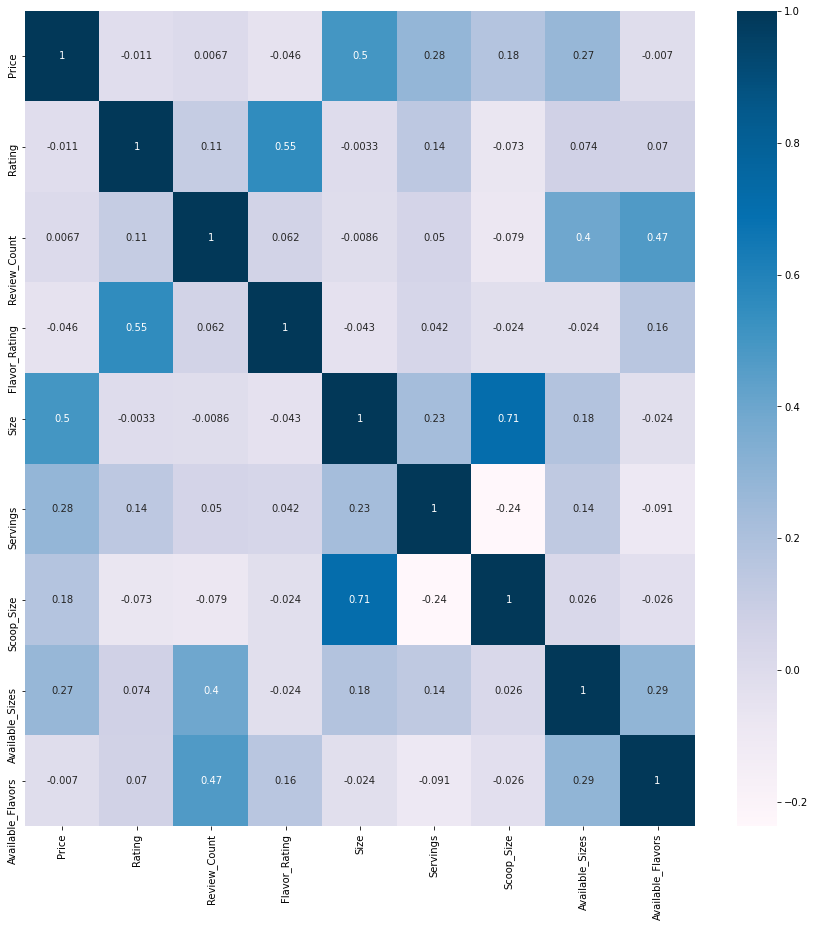

In [24]:
#Let's create a correlation matrix for numerica variables
plt.figure(figsize = (15,15))
sns.heatmap(data_df[numeric_cols].corr() , annot = True , cmap = 'PuBu')

* The above heatmap shows nice correlations between our numeric columns you can certainly some ***correlation between size and price of the products.***





## Creating Machine Learning Models


* Now that we have basic understanding of the data let's work on using machine learning to predict the prices of the products.

*   We'll use three machine learning algorithms which will be ***random forests***, ***XGBOOST*** and ***AdaBoost***.
*   The metrics we will use are ***RMSE***,***MAE***  and ***R2-score***
*   Finally after training the model we will use shapely values to understand what features affected the predictions,

In [0]:
#Importing the required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn import metrics
import math
import xgboost as xgb

In [0]:
#Using label encoder to encode the data
for col in categorical_cols:
    lbl = LabelEncoder()
    data_df[col] = lbl.fit_transform(data_df[col])


In [0]:
#We will be dropping Product name from the data as there are so many unique values
data_df = data_df.drop('Product' , axis = 1)

In [0]:
y = data_df['Price'].values
X = data_df.drop('Price' , axis = 1).values


In [29]:
data_df.head()

,Brand,Price,Rating,Review_Count,Flavor_Rating,Flavor,Size,Servings,Scoop_Size,Available_Sizes,Available_Flavors,product_type
0,50,47.99,9.3,10029,9.1,80,5.008897,71.0,32.0,5.0,18.0,0
1,30,46.98,9.2,2727,9.0,38,3.968316,45.0,40.0,4.0,7.0,0
2,14,37.49,8.8,668,8.9,141,4.947167,66.0,34.0,2.0,5.0,0
3,50,22.49,9.3,10029,9.1,80,1.975340,28.0,32.0,5.0,19.0,0
4,7,36.74,9.2,3966,9.4,48,4.973623,48.0,47.0,5.0,7.0,0


* Since we have less amount of data only 500 rows we will be using Kfold cross validation to prevent overfitting

In [0]:
def CreateModels(model_name):

    if model_name =='rf':
        return RandomForestRegressor(n_estimators = 200,
                                     max_depth = 6,
                                     random_state = 42)
    elif model_name == 'xgb':
        return xgb.XGBRegressor(n_estimators = 150 , max_depth = 6 , eta = 0.03,
                                objective ='reg:squarederror', alpha = 2)
    else:
        return AdaBoostRegressor(base_estimator = RandomForestRegressor(max_depth = 3),
                                 n_estimators = 100,
                                 random_state = 42)
    

In [31]:
import ipywidgets
def TrainOnFolds(model_name,folds):

    #y_preds = []
    #y_true = []
    rmse, mae_val , r2 = [],[],[]

    model = CreateModels(model_name)
    kf = KFold(n_splits = folds , random_state = 42 , shuffle = True)
    print("Training Models...")
    for i , (train_idx,test_idx) in enumerate(kf.split(X)):

        X_train ,y_train = X[train_idx] , y[train_idx]
        X_test , y_test = X[test_idx] , y[test_idx]

        #y_true.append(y_test)
        model.fit(X_train , y_train)
        pred = model.predict(X_test)

        #y_preds.append(pred)
        mse = metrics.mean_squared_error(y_test , pred)
        mae = metrics.mean_absolute_error(y_test , pred)
        r2_score = metrics.r2_score(y_test , pred)

        rmse.append(math.sqrt(mse))
        mae_val.append(mae)
        r2.append(r2_score)

        print(f"Fold : {i+1} || RMSE :{math.sqrt(mse)} || MAE : {mae} || R2-Score : {r2_score}")
    print(f"Mean RMSE : {np.mean(rmse)} || Mean MAE : {np.mean(mae_val)} || Mean R2-Score : {np.mean(r2)}")
    
ipywidgets.interact_manual.opts['manual_name'] = 'Train Models'
interact_manual(TrainOnFolds, model_name = ['rf' , 'xgb' , 'ada'] , folds = (2,10))


interactive(children=(Dropdown(description='model_name', options=('rf', 'xgb', 'ada'), value='rf'), IntSlider(…

<function __main__.TrainOnFolds>

* You can use the above interactive method to train the models, You can see the models perform poorly. Here are the possible reasons,

    *   Lack of data
    *   Need Fine tuning for parameters

* Feel free to train other models and experiment with it and let me know.


* Let's start using machine learning interpretability for understanding the model, I'm gonna choose RandomForest for my analysis.

In [0]:
!pip install eli5
!pip install shap

In [41]:
from sklearn.model_selection import train_test_split
from eli5.sklearn import PermutationImportance
import shap
import eli5
y_shap = data_df["Price"]
X_shap = data_df.drop('Price' , axis = 1)
X_train , X_test ,  y_train, y_test = train_test_split(X_shap,y_shap,test_size = 0.2, random_state = 42)


model = RandomForestRegressor(n_estimators = 200,
                               max_depth = 6,
                               random_state = 42)
model.fit(X_train.values , y_train.values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [42]:
perm = PermutationImportance(model, random_state=1).fit(X_test.values, y_test.values)
eli5.show_weights(perm, feature_names = data_df.drop('Price' , axis = 1).columns.to_list())


Weight,Feature
0.9332 ± 0.2967,Size
0.1919 ± 0.1140,Servings
0.0869 ± 0.2447,Available_Sizes
0.0360 ± 0.0718,Brand
0.0242 ± 0.0536,Available_Flavors
0.0157 ± 0.0107,Review_Count
0.0039 ± 0.0162,Scoop_Size
-0.0028 ± 0.0227,Flavor
-0.0051 ± 0.0026,product_type
-0.0209 ± 0.0234,Flavor_Rating


## Interpretation
* The values towards the top are the most important features, and those towards the bottom matter least.

* The first number in each row shows how much model performance decreased with a random shuffling

* The number after the ± measures how performance varied from one-reshuffling to the next.You'll occasionally see negative values for permutation importances. In those cases, the predictions on the shuffled (or noisy) data happened to be more accurate than the real data. This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


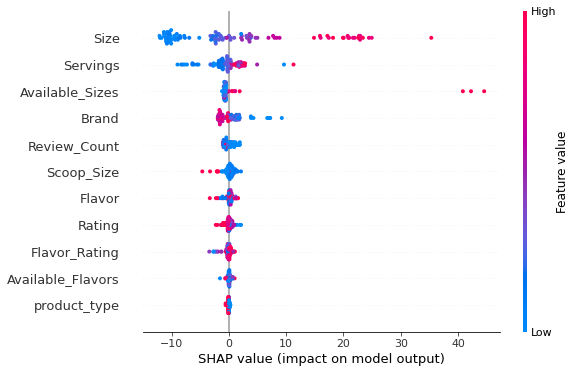

In [43]:
# Create object that can calculate shap values
model.fit(X_train,y_train)
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.

shap_values = explainer.shap_values(X_test)

#Summary Plot
shap.summary_plot(shap_values , X_test)

* SHAP summary plots give us a birds-eye view of feature importance and what is driving it.
* The plot has many dots, they have the following charateristics
    * Vertical location shows what feature it is depicting
    * Color shows whether that feature was high or low for that row of the dataset.
    * Horizontal location shows whether the effect of that value caused a higher or lower prediction.

* Some Insights
    * The high values of size result  in predicition for models and the same is applicable for servings feature.
    * The review count feature didn't contributed at all.

In [45]:
def make_DependencePlot(columns , interact_index):
    shap_values_pdp = explainer.shap_values(X_shap)
    shap.dependence_plot(columns, shap_values_pdp, X_shap, interaction_index= interact_index)

cols = X_shap.columns.to_list()
interact(make_DependencePlot ,columns = cols , interact_index = cols)

interactive(children=(Dropdown(description='columns', options=('Brand', 'Rating', 'Review_Count', 'Flavor_Rati…

<function __main__.make_DependencePlot>

* Each dot represents a row of the data. The horizontal location is the actual value from the dataset, and the vertical location shows what having that value did to the prediction.
* The fact that the slope is downward slope for the Rating vs size, says that more ratings are given to the product with less which implies that the product cost is going to be low.

## ***Conclusion and Future Scope***

* From the above analysis it is clear that size , Servings are the most important factor which affect the price of the product.
* We also found that Available flavors and review count do not affect the predicitons of the model as much.

* **Here are the models R2-Score for the 5-folds**

    * ***Random Forest : 0.378***
    * ***XGBoost : 0.438***
    * ***AdaBoost : 0.37***
* For future scope, you can collect more data regarding the products  like their contents etc.
* You can also try to increase the amount of data using sampling methods like SMOTE.
* Try using hyperparameter tuning to find the most optimal hyperparameters.